In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import locale
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd


In [2]:
file_df = 'Wind_power'
df = pd.read_csv(file_df +'.csv', header=0)

In [3]:
df.columns

Index(['Year', 'Installed capacity (MW)', 'Total generation (Gwh)'], dtype='object')

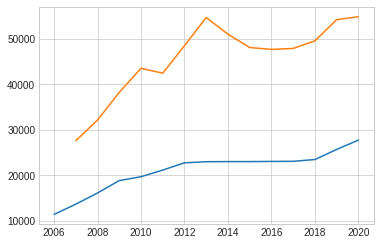

In [4]:
ax = plt.axes()
plt.plot(df['Year'],df['Installed capacity (MW)'])
plt.plot(df['Year'],df['Total generation (Gwh)'])

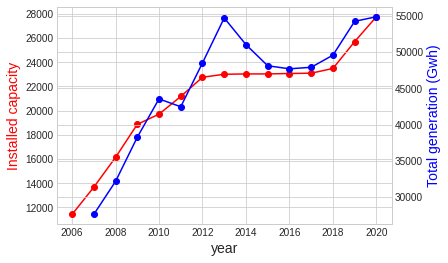

In [5]:
fig,ax = plt.subplots()
# make a plot
ax.plot(df['Year'],df['Installed capacity (MW)'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Installed capacity",color="red",fontsize=14)

### the other graph
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df['Year'],df['Total generation (Gwh)'],color="blue",marker="o")
ax2.set_ylabel("Total generation (Gwh)",color="blue",fontsize=14)
plt.show()
# save the plot as a file



In [6]:
file_df = 'renovables_datos_test'
df = pd.read_csv(file_df +'.csv', header=0)

In [7]:
df.dtypes

Potencia MW     object
2015           float64
2016           float64
2017           float64
2018           float64
2019           float64
2020           float64
2021           float64
dtype: object

In [8]:
df1 = df.set_index('Potencia MW').T.reset_index()
df1.columns

Index(['index', 'Hydro', 'Mixed Pumping', 'Pumped storage', 'Nuclear', 'Coal',
       'Fuel + Gas', 'Diesel engines', 'Gas turbine', 'Steam turbine',
       'Combined cycle', 'Hydroeolian', 'Wind', 'Solar photovoltaic',
       'Thermal solar', 'Other renewables', 'Cogeneration',
       'Non-renewable waste', 'Renewable waste', 'Total capacity'],
      dtype='object', name='Potencia MW')

In [9]:
df1.rename(columns={'index':'Year'}, inplace=True)
df1

Potencia MW,Year,Hydro,Mixed Pumping,Pumped storage,Nuclear,Coal,Fuel + Gas,Diesel engines,Gas turbine,Steam turbine,Combined cycle,Hydroeolian,Wind,Solar photovoltaic,Thermal solar,Other renewables,Cogeneration,Non-renewable waste,Renewable waste,Total capacity
0,2015,17042.64,0.0,3331.4,7572.58,10962.42,7.95,811.27,1148.65,482.64,26636.00,11.32,22922.23,4680.96,2304.01,887.47,6238.17,452.21,153.32,105645.23
1,2016,17049.67,0.0,3331.4,7572.58,10030.29,7.95,811.27,1148.65,482.64,26636.00,11.32,22973.67,4685.79,2304.01,890.09,6016.26,440.28,153.32,104545.19
2,2017,17052.94,0.0,3331.4,7117.29,10030.29,7.95,811.27,1148.65,482.64,26636.00,11.32,23068.07,4687.99,2304.01,886.85,5850.54,444.28,157.32,104028.80
3,2018,17063.59,0.0,3331.4,7117.29,10030.29,7.95,811.27,1148.65,482.64,26250.15,11.32,23433.05,4766.75,2304.01,891.74,5837.78,444.28,157.32,104089.48
4,2019,17097.78,0.0,3331.4,7117.29,9683.45,7.95,768.67,1148.65,482.64,26250.15,11.32,25682.85,8782.90,2304.01,1041.97,5718.77,437.75,157.32,110024.86
5,2020,17097.68,0.0,3331.4,7117.29,5733.23,7.95,768.67,1148.65,482.64,26250.15,11.32,27494.39,11738.46,2304.01,1090.30,5702.85,428.07,157.32,110864.37
6,2021,17093.18,0.0,3331.4,7117.29,4883.72,7.95,768.67,1148.65,482.64,26250.15,11.32,27982.00,13602.47,2304.01,1090.61,5646.53,440.86,170.11,112331.55


In [10]:
df1.dtypes

Potencia MW
Year                    object
Hydro                  float64
Mixed Pumping          float64
Pumped storage         float64
Nuclear                float64
Coal                   float64
Fuel + Gas             float64
Diesel engines         float64
Gas turbine            float64
Steam turbine          float64
Combined cycle         float64
Hydroeolian            float64
Wind                   float64
Solar photovoltaic     float64
Thermal solar          float64
Other renewables       float64
Cogeneration           float64
Non-renewable waste    float64
Renewable waste        float64
Total capacity         float64
dtype: object

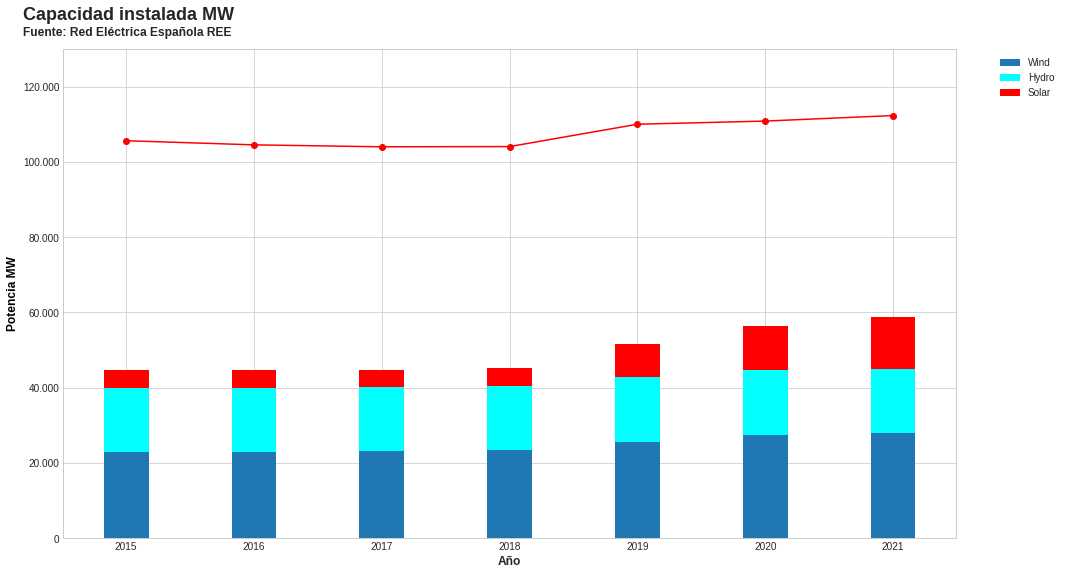

In [11]:
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
plt.rcParams['axes.formatter.use_locale'] = True
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["figure.figsize"] = [16,9]
fig,ax = plt.subplots()
# make a plot

#ax.set_title('Potencia Instalada por tecnología MW',color="black",fontsize=24)
ax.plot(df1['Year'],df1['Total capacity'], color="red", marker="o")
ax.set_ylim([0,130000])
# set x-axis label
ax.set_xlabel("Año",fontsize=12, fontweight='bold')
# set y-axis label
ax.set_ylabel("Potencia MW",color="black",fontsize=12, fontweight='bold')

width = 0.35
ax.bar(df1['Year'], df1['Wind'], width,  label='Wind')
ax.bar(df1['Year'], df1['Hydro'], width,  label='Hydro', bottom = df1['Wind'], color='cyan')
ax.bar(df1['Year'], df1['Solar photovoltaic'], width,  bottom = (df1['Wind']+df1['Hydro']),
       label='Solar', color='red')

#ax.legend(bbox_to_anchor=(1.12, 1), title='Etiquetas')
ax.legend(bbox_to_anchor=(1.12, 1))
plt.figtext(0.09, 0.925, "Capacidad instalada MW", fontsize=18, fontweight='bold')
plt.figtext(0.09, 0.9, "Fuente: Red Eléctrica Española REE", fontsize=12, fontweight='bold')

plt.savefig("capacidad_REE.pdf")
plt.show()

plt.show()


In [12]:
file_df = 'generation_spain_data'
df = pd.read_csv(file_df +'.csv', header=0)
df

,Generación GWh,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Hidráulica,27105.5070,22935.484,26186.408,41833.806,30437.318140,20653.566610,37385.436840,39181.985230,28382.579980,36114.888200,18450.618740,34117.241350,24719.015200,30614.253500,25341.135220
1,Turbinación bombeo,3102.6130,2661.765,2655.946,3120.458,2183.536285,3201.889800,3289.677185,3415.996048,2895.365800,3134.329059,2248.964443,1993.996010,1645.505104,2748.100697,2051.532220
2,Nuclear,52638.9270,56460.291,50549.445,59242.322,55005.874870,58595.438800,54210.788120,54781.281340,54661.803310,56021.682060,55539.351050,53197.617430,55824.226780,55756.774910,44274.101170
3,Carbón,70630.1030,46508.363,34793.025,23700.613,43177.464380,53779.891170,39441.537720,43246.056500,52616.477600,37313.777750,45019.420390,37276.805720,12670.637400,5021.717210,3360.901836
4,Fuel + Gas,2090.7650,2074.895,1789.590,1566.023,-10.012343,-3.812641,-2.012715,-0.819731,0.016618,0.000235,0.000000,0.000000,0.000000,0.000000,0.000000
5,Motores diésel,3578.8410,3649.238,3557.747,3637.090,3503.397878,3476.850792,3218.330298,3227.383088,3345.074394,3602.463490,3456.023552,3178.179141,2836.053144,2399.438012,1983.772118
6,Turbina de gas,988.2210,749.196,685.340,646.045,880.242223,939.821432,883.666428,946.991236,915.771849,616.037302,871.160048,1049.279011,670.532077,406.585989,335.957443
7,Turbina de vapor,3306.8050,3414.241,3243.628,2972.586,2634.295117,2681.695927,2463.796999,2070.771428,2222.950567,2536.143003,2674.393850,2455.432297,2189.010668,1387.606690,816.624050
8,Ciclo combinado,70624.0910,93197.539,80223.795,66798.985,53430.948740,41074.444720,27569.900640,24828.834000,29027.289340,29006.482090,37065.787080,30044.467200,55241.970220,44022.959720,30478.779560
9,Hidroeólica,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.889277,8.207424,17.891936,20.233057,23.655544,23.248718,19.540227,19.959721


In [13]:
df1 = df.set_index('Generación GWh').T.reset_index()
df1.rename(columns={'index':'Year'}, inplace=True)


In [14]:
df1.dtypes

Generación GWh
Year                       object
Hidráulica                float64
Turbinación bombeo        float64
Nuclear                   float64
Carbón                    float64
Fuel + Gas                float64
Motores diésel            float64
Turbina de gas            float64
Turbina de vapor          float64
Ciclo combinado           float64
Hidroeólica               float64
Eólica                    float64
Solar fotovoltaica        float64
Solar térmica             float64
Otras renovables          float64
Cogeneración              float64
Residuos no renovables    float64
Residuos renovables       float64
Generación total          float64
dtype: object

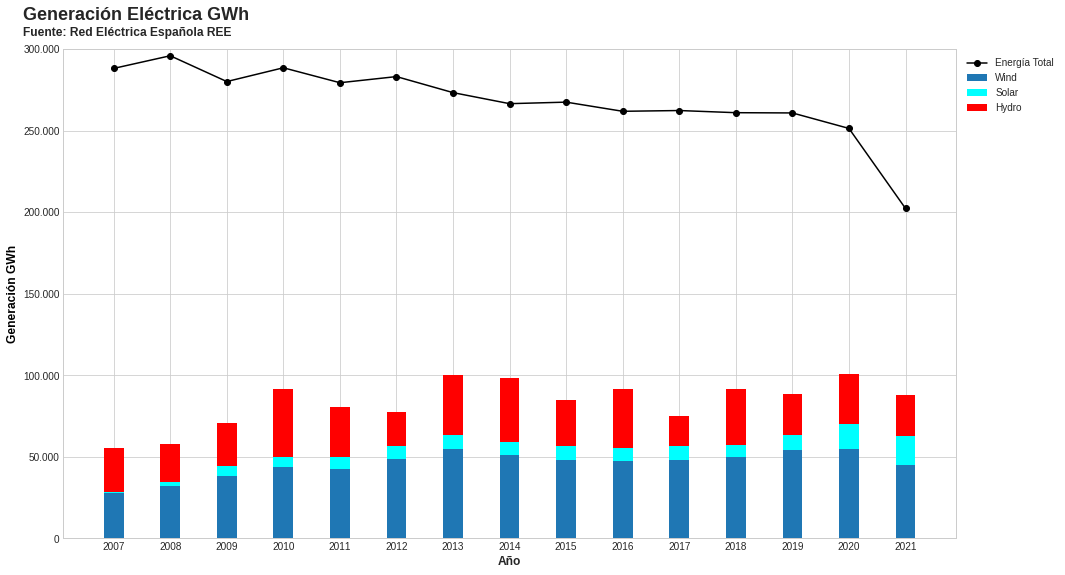

In [15]:

locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
plt.rcParams['axes.formatter.use_locale'] = True
plt.rcParams["figure.figsize"] = [16,9]

fig,ax = plt.subplots()
# make a plot
#ax.set_title('Generación Eléctrica GWh',color = "black", fontsize=14, loc='left')
ax.plot(df1['Year'],df1['Generación total'], color="black", marker="o", label = "Energía Total")
ax.set_ylim([0,300000])
# set x-axis label
ax.set_xlabel("Año",fontsize=12, fontweight='bold')
# set y-axis label
ax.set_ylabel("Generación GWh",color="black",fontsize=12, fontweight='bold')

#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

width = 0.35
ax.bar(df1['Year'], df1['Eólica'], width,  label='Wind')
ax.bar(df1['Year'], df1['Solar fotovoltaica'], width,  label='Solar', bottom = df1['Eólica'], color='cyan')
ax.bar(df1['Year'], df1['Hidráulica'], width,  bottom = (df1['Eólica']+df1['Solar fotovoltaica']),
       label='Hydro', color='red')

#ax.legend(bbox_to_anchor=(1.12, 1), title='Etiquetas')
ax.legend(bbox_to_anchor=(1.12, 1))
plt.figtext(0.09, 0.925, "Generación Eléctrica GWh", fontsize=18, fontweight='bold')
plt.figtext(0.09, 0.9, "Fuente: Red Eléctrica Española REE", fontsize=12, fontweight='bold')

plt.savefig("generacion_REE.pdf")
plt.show()